## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

#### Biblioteca de importação

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Carregando base de dados

In [23]:
boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [24]:
X = boston.drop(columns=['medv']).copy()
X = pd.get_dummies(X, drop_first = True)
y = boston[['medv']]

#### Visualização dos dados

In [25]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [26]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

#### Separação dos dados em validação e teste

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

#### Treino da árvore de profundidade 2

In [28]:
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

#### Cálculo 

#### Visualização da árvore de treinamento

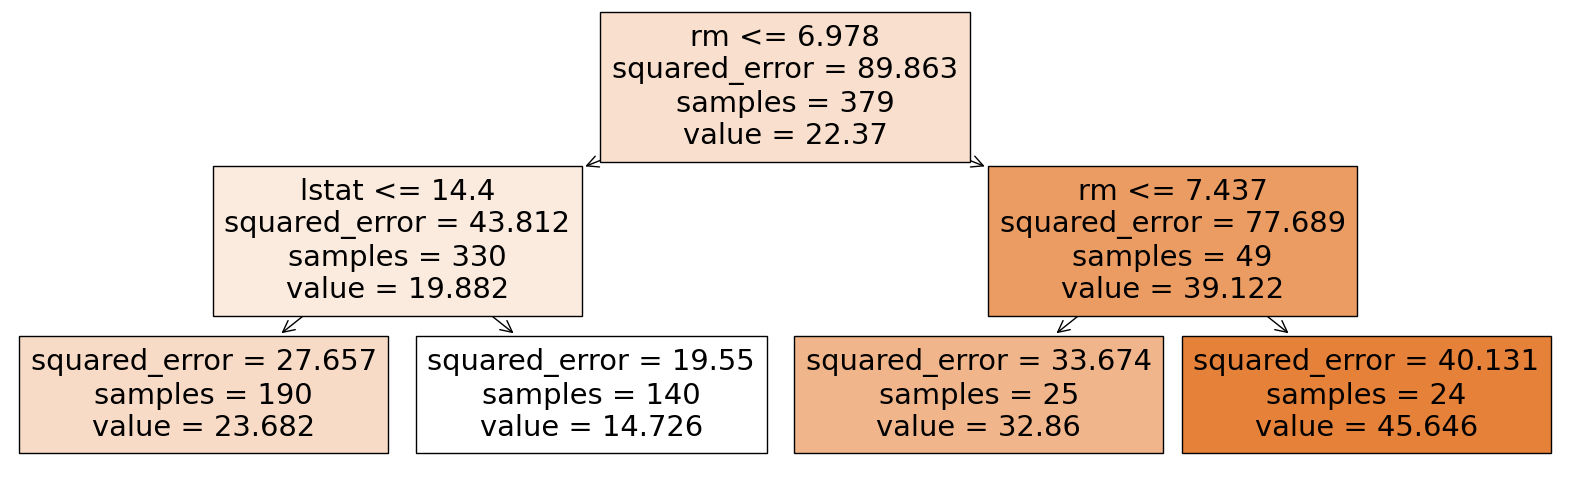

In [29]:
plt.figure(figsize=(20, 6))
tp = tree.plot_tree(regr_2, feature_names=list(X.columns.values), filled=True) 

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [30]:
path = regr_2.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([ 0.        ,  5.28170375, 17.06061075, 41.67185681]),
 'impurities': array([25.84925111, 31.13095486, 48.19156561, 89.86342242])}

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [31]:
ccp_alphas = path.ccp_alphas
clfs = []

for ccp_alphas in ccp_alphas:
    clf=DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alphas)
    clf.fit(X_train, y_train)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [32]:
train_scores = [mean_squared_error(y_train, clf.predict(X_train)) for clf in clfs]
train_scores

[0.0, 25.84925110765039, 48.19156561142086, 89.86342242117502]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

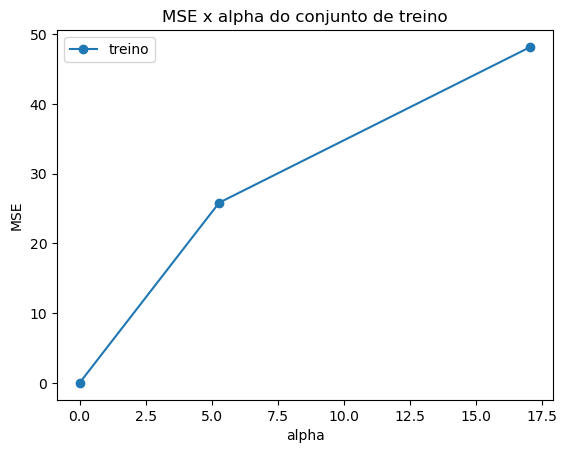

In [33]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de treino')
ax.plot(path.ccp_alphas[:-1], train_scores[:-1], marker='o', label='treino',)
ax.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [34]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=5)

arvore_final.fit(X_train, y_train)

r2_arvore_final = arvore_final.score(X_test, y_test)
r2_arvore_final

0.6100347551605463

### 7. Visualize esta árvore.

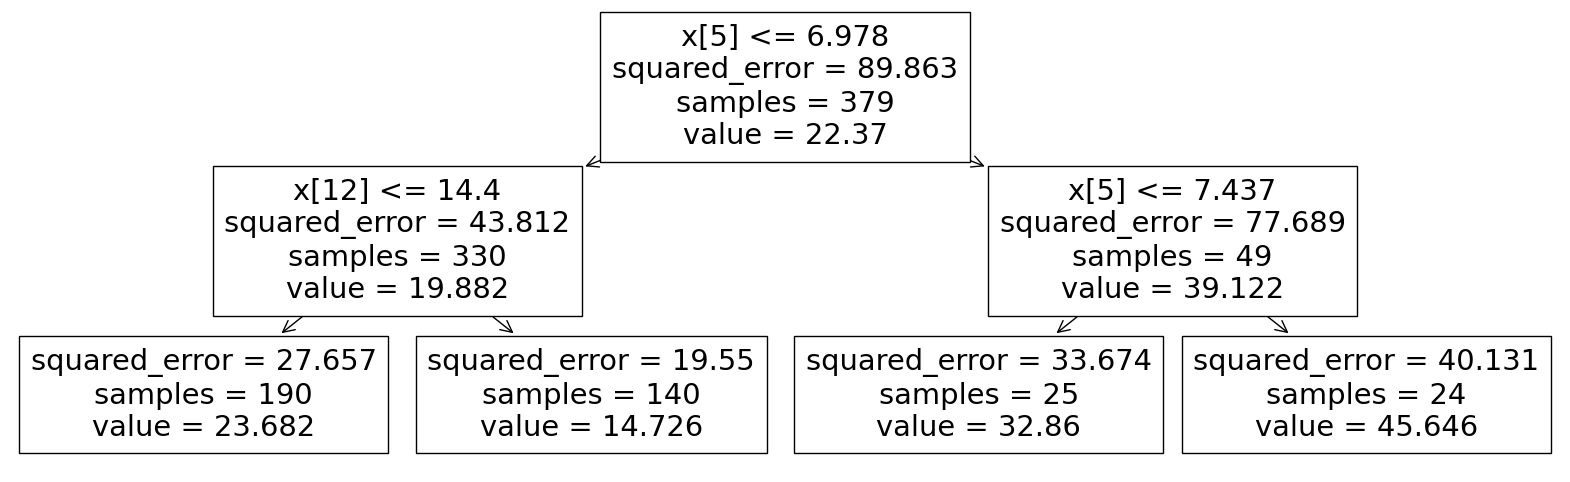

In [35]:
plt.figure(figsize=(20, 6))
tp_2 = tree.plot_tree(arvore_final)